* Import Libaries
* import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score

In [2]:
data = pd.read_csv('Video_Games_data.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
data.dropna(inplace = True)
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [5]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [6]:
data.shape

(6825, 16)

In [7]:
data['Developer'].unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [8]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Black Label Games', 'Sou

In [9]:
data['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

# Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? 
* Label Encoding

In [10]:
le = LabelEncoder()

data["Name"] = le.fit_transform(data["Name"])
data["Platform"] = le.fit_transform(data["Platform"])
data["Genre"] = le.fit_transform(data["Genre"])
data["Publisher"] = le.fit_transform(data["Publisher"])
data["Developer"] = le.fit_transform(data["Developer"])
data["Rating"] = le.fit_transform(data["Rating"].astype(str))

X = data.drop(["Global_Sales"], axis = 1)
y = data["Global_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

X_train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3443,1990,8,2011.0,10,199,0.54,0.00,0.0,0.04,90.0,30.0,7.8,87.0,959,1
1455,3933,16,2015.0,8,237,0.77,0.45,0.0,0.12,74.0,24.0,6.9,252.0,1189,4
3033,4146,10,2006.0,2,220,0.33,0.20,0.0,0.14,78.0,13.0,8.1,21.0,1262,6
10618,3519,2,2006.0,5,256,0.09,0.00,0.0,0.01,25.0,4.0,3.5,4.0,422,1
6408,489,14,2011.0,8,237,0.14,0.10,0.0,0.03,47.0,62.0,5.7,109.0,1123,4


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 3.452583532105184e-05
R^2: 0.999995005622488


In [12]:
feature_importances = pd.DataFrame(lr.coef_, index = X_train.columns, columns = ["Coefficient"])
print(feature_importances.sort_values("Coefficient", ascending = False).head(10))
print(y_pred[:10])

                  Coefficient
Other_Sales      1.000319e+00
JP_Sales         1.000073e+00
NA_Sales         9.998905e-01
EU_Sales         9.996959e-01
Rating           1.550202e-05
Critic_Score     6.995529e-06
Year_of_Release  3.569013e-06
Name             1.152568e-07
Developer        2.703203e-08
User_Count      -1.235094e-08
[0.42009523 0.12028316 1.50060961 0.48030929 0.56041111 0.1604666
 0.76050544 0.00977839 0.10024525 0.49006527]


In [13]:
rf = RandomForestRegressor(n_estimators = 250, random_state = 7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 1.9975323992486358
R^2: 0.7110444743317514


In [14]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = ["Importance"])
print(feature_importances.sort_values("Importance", ascending = False).head(10))
print(y_pred[:10])

                 Importance
NA_Sales           0.585694
EU_Sales           0.337967
Other_Sales        0.051018
JP_Sales           0.014725
Critic_Count       0.002141
Name               0.001999
User_Score         0.001352
User_Count         0.001070
Year_of_Release    0.000914
Genre              0.000790
[0.4218  0.1026  1.52124 0.48952 0.5528  0.15796 1.0542  0.01456 0.0974
 0.49136]


In [15]:
gbr = GradientBoostingRegressor(n_estimators = 250, max_depth = 4, learning_rate = 0.1, loss = 'squared_error')
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R^2: ", r2)

MSE:  1.766779319236156
R^2:  0.7444243471987216


In [16]:
feature_importances = pd.DataFrame(gbr.feature_importances_, index = X_train.columns, columns = ["Importance"])
print(feature_importances.sort_values("Importance", ascending = False).head(10))
print(y_pred[:10])

                 Importance
NA_Sales           0.558883
EU_Sales           0.343453
Other_Sales        0.076893
JP_Sales           0.018931
Year_of_Release    0.000506
User_Score         0.000487
User_Count         0.000452
Name               0.000184
Critic_Count       0.000072
Critic_Score       0.000043
[0.43233213 0.12048768 1.41126643 0.45450778 0.55676646 0.1558805
 0.81431306 0.01519553 0.1016117  0.47552744]


Observation: Regional sales variables, especially in combination, are the best predictors of "global sales" of video games in this dataset.

* Split data
    * Support Vector Machine
    * Random Forest
    * Gradient Boosting

# Use all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings

In [17]:
cat_features = ['Platform', 'Genre', 'Rating']
for feature in cat_features:
    y = data[feature]
    X = data.drop(cat_features, axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

    svm = SVC()
    svm.fit(X_train, y_train)
    train_acc_svm = svm.score(X_train, y_train)
    test_acc_svm = svm.score(X_test, y_test)
    y_pred_svm = svm.predict(X_test)

    rf = RandomForestClassifier(random_state = 7)
    rf.fit(X_train, y_train)
    train_acc_rf = rf.score(X_train, y_train)
    test_acc_rf = rf.score(X_test, y_test)
    y_pred_rf = rf.predict(X_test)

    gb = GradientBoostingClassifier(random_state = 7)
    gb.fit(X_train, y_train)
    train_acc_gb = gb.score(X_train, y_train)
    test_acc_gb = gb.score(X_test, y_test)
    y_pred_gb = gb.predict(X_test)
    
    print(f"\nResults for {feature}:")
    print(f"SVM - Training Accuracy: {train_acc_svm}, Testing Accuracy: {test_acc_svm}, F1 Score: {f1_score(y_test, y_pred_svm, average = 'weighted')}")
    print(f"Random Forest - Training Accuracy: {train_acc_rf}, Testing Accuracy: {test_acc_rf}, F1 Score: {f1_score(y_test, y_pred_rf, average = 'weighted')}")
    print(f"Gradient Boosting - Training Accuracy: {train_acc_gb}, Testing Accuracy: {test_acc_gb}, F1 Score: {f1_score(y_test, y_pred_gb, average = 'weighted')}")



Results for Platform:
SVM - Training Accuracy: 0.20457875457875457, Testing Accuracy: 0.20952380952380953, F1 Score: 0.09701250242642358
Random Forest - Training Accuracy: 1.0, Testing Accuracy: 0.6681318681318681, F1 Score: 0.658891901785137
Gradient Boosting - Training Accuracy: 0.8756410256410256, Testing Accuracy: 0.6783882783882784, F1 Score: 0.6733168919918726

Results for Genre:
SVM - Training Accuracy: 0.24816849816849818, Testing Accuracy: 0.22197802197802197, F1 Score: 0.08813029727378542
Random Forest - Training Accuracy: 1.0, Testing Accuracy: 0.5208791208791209, F1 Score: 0.5026490371943382
Gradient Boosting - Training Accuracy: 0.7368131868131869, Testing Accuracy: 0.5516483516483517, F1 Score: 0.5424265569008012

Results for Rating:
SVM - Training Accuracy: 0.432967032967033, Testing Accuracy: 0.43223443223443225, F1 Score: 0.3926505419787056
Random Forest - Training Accuracy: 1.0, Testing Accuracy: 0.6344322344322344, F1 Score: 0.6261326379795076
Gradient Boosting - Tr

Observation: results suggest that the Platform and Rating variables are better predictors of video game sales than the Genre variable. 

# In the video game dataset, use a relevant categorical variable and other relevant non-categorical variables to form groups at each instance. By employing internal and external evaluation metrics, determine which categorical variable best describes the groups formed

* Forming the relevant groups
* Clustering and evaluation
    * Davies-Bouldin index - measures the average similarity between each cluster's elements, and the distance between clusters. A lower score indicates better clustering, where a score of 0 means perfect clustering
    * Fowlkes-Mallows index - measures the similarity between the true and predicted clusters. It is calculated based on the precision and recall values of the predicted clusters. A higher score indicates better clustering, where a score of 1 means perfect clustering
    * Calinski-Harabasz - measures the ratio of between-cluster variance to within-cluster variance. A higher score indicates better clustering, where a score of infinity means perfect clustering. It is also known as the Variance Ratio Criterion

Platform: Silhouette score = 0.602, Calinski-Harabasz score = 83693.733, Davies-Bouldin Index = 0.493


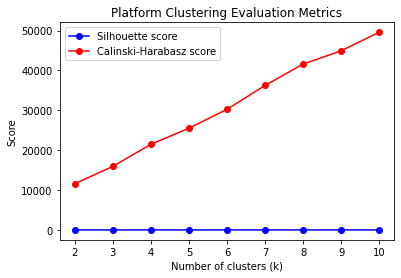

Genre: Silhouette score = 0.690, Calinski-Harabasz score = 59484.949, Davies-Bouldin Index = 0.492


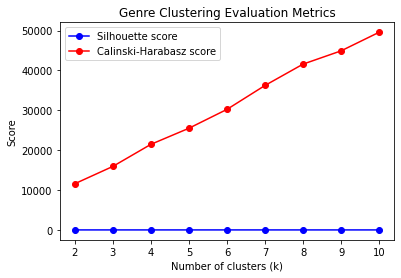

Rating: Silhouette score = 0.821, Calinski-Harabasz score = 36243.710, Davies-Bouldin Index = 0.447


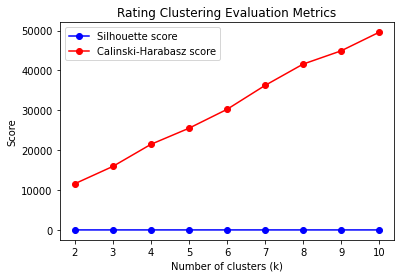

In [18]:
cat_cols = ["Platform", "Genre", "Rating"]
num_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Year_of_Release", "User_Score", "User_Count"]

X = pd.concat([data[cat_cols], data[num_cols]], axis = 1)

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

    kmeans = KMeans(n_clusters = len(X[col].unique()), random_state = 0).fit(X)
    labels = kmeans.labels_

    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    # fm_score = fowlkes_mallows_score(data["Global_Sales"], labels)

    print(f"{col}: Silhouette score = {sil_score:.3f}, Calinski-Harabasz score = {ch_score:.3f}, Davies-Bouldin Index = {db_score:.3f}")
    k_range = range(2, 11)
    silhouette_scores = []
    calinski_harabasz_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    plt.figure()
    plt.plot(k_range, silhouette_scores, 'bo-', label = 'Silhouette score')
    plt.plot(k_range, calinski_harabasz_scores, 'ro-', label = 'Calinski-Harabasz score')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Score')
    plt.title(f"{col} Clustering Evaluation Metrics")
    plt.legend()
    plt.show()